In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
listing=pd.read_csv('listings.csv')
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
listing.shape

(3818, 92)

In [5]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
priceData=listing[['id', 'price', 'zipcode', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']]
priceData.head()

,id,price,zipcode,neighbourhood_cleansed,neighbourhood_group_cleansed
0,241032,$85.00,98119,West Queen Anne,Queen Anne
1,953595,$150.00,98119,West Queen Anne,Queen Anne
2,3308979,$975.00,98119,West Queen Anne,Queen Anne
3,7421966,$100.00,98119,West Queen Anne,Queen Anne
4,278830,$450.00,98119,West Queen Anne,Queen Anne


In [7]:
priceData=priceData.dropna()

In [8]:
priceData['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [9]:
priceData.shape

(3811, 5)

In [10]:
priceData.price.head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [11]:
priceDataList=[]
for i in priceData.price:
   priceDataList.append(i)
    
newPriceDataList=[]
for i in priceDataList:
   newPriceDataList.append(float(i.replace(',', '').replace('.00', '').replace('$', '')))

cleanPriceData=pd.DataFrame(newPriceDataList, columns = ['cleanPrice_PriceData'])
cleanPriceData.head()

,cleanPrice_PriceData
0,85.0
1,150.0
2,975.0
3,100.0
4,450.0


In [12]:
cleanPriceData.shape

(3811, 1)

In [13]:
priceData = priceData.assign(price=cleanPriceData['cleanPrice_PriceData'])
#priceData.set_index('id', inplace=True, drop=True)
priceData.head()

,id,price,zipcode,neighbourhood_cleansed,neighbourhood_group_cleansed
0,241032,85.0,98119,West Queen Anne,Queen Anne
1,953595,150.0,98119,West Queen Anne,Queen Anne
2,3308979,975.0,98119,West Queen Anne,Queen Anne
3,7421966,100.0,98119,West Queen Anne,Queen Anne
4,278830,450.0,98119,West Queen Anne,Queen Anne


In [14]:
priceData.price.describe()

count    3804.000000
mean      127.861199
std        90.158774
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [15]:
queenAnne=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Queen Anne']
ballard=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Ballard']
cascade=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Cascade']
centralArea=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Central Area']
universityDistrict=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'University District']
downtown=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Downtown']
magnolia=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Magnolia']
westSeattle=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'West Seattle']
interbay=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Interbay']
beaconHill=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Beacon Hill']
rainierValley=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Rainier Valley']
delridge=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Delridge']
sewardPark=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Seward Park']
northGate=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Northgate']
capitolHill=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Capitol Hill']
lakeCity=priceData.loc[priceData['neighbourhood_group_cleansed'] == 'Lake City']


In [16]:
queenAnneDesc=pd.DataFrame(queenAnne.price.describe())
queenAnneDesc=queenAnneDesc.rename(columns={"price": "Queen Anne"})

ballardDesc=pd.DataFrame(ballard.price.describe())
ballardDesc=ballardDesc.rename(columns={"price": "Ballard"})

cascadeDesc=pd.DataFrame(cascade.price.describe())
cascadeDesc=cascadeDesc.rename(columns={"price": "Cascade"})

centralAreaDesc=pd.DataFrame(centralArea.price.describe())
centralAreaDesc=centralAreaDesc.rename(columns={"price": "Central Area"})

universityDistrictDesc=pd.DataFrame(universityDistrict.price.describe())
universityDistrictDesc=universityDistrictDesc.rename(columns={"price": "University District"})

downtownDesc=pd.DataFrame(downtown.price.describe())
downtownDesc=downtownDesc.rename(columns={"price": "Downtown"})

magnoliaDesc=pd.DataFrame(magnolia.price.describe())
magnoliaDesc=magnoliaDesc.rename(columns={"price": "Magnolia"})

westSeattleDesc=pd.DataFrame(westSeattle.price.describe())
westSeattleDesc=westSeattleDesc.rename(columns={"price": "West Seattle"})

interbayDesc=pd.DataFrame(interbay.price.describe())
interbayDesc=interbayDesc.rename(columns={"price": "Interbay"})

beaconHillDesc=pd.DataFrame(beaconHill.price.describe())
beaconHillDesc=beaconHillDesc.rename(columns={"price": "Beacon Hill"})

rainierValleyDesc=pd.DataFrame(rainierValley.price.describe())
rainierValleyDesc=rainierValleyDesc.rename(columns={"price": "Rainier Valley"})

delridgeDesc=pd.DataFrame(delridge.price.describe())
delridgeDesc=delridgeDesc.rename(columns={"price": "Delridge"})

sewardParkDesc=pd.DataFrame(sewardPark.price.describe())
sewardParkDesc=sewardParkDesc.rename(columns={"price": "Seward Park"})

northGateDesc=pd.DataFrame(northGate.price.describe())
northGateDesc=northGateDesc.rename(columns={"price": "Northgate"})

capitolHillDesc=pd.DataFrame(capitolHill.price.describe())
capitolHillDesc=capitolHillDesc.rename(columns={"price": "Capitol Hill"})

lakeCityDesc=pd.DataFrame(lakeCity.price.describe())
lakeCityDesc=lakeCityDesc.rename(columns={"price": "Lake City"})


In [17]:
statPriceNeighborhoodGroup=pd.concat([queenAnneDesc, ballardDesc, cascadeDesc, centralAreaDesc, universityDistrictDesc,
                                     downtownDesc, magnoliaDesc, westSeattleDesc, interbayDesc, beaconHillDesc, rainierValleyDesc,
                                     delridgeDesc, sewardParkDesc, northGateDesc, capitolHillDesc, lakeCityDesc], axis=1)
statPriceNeighborhoodGroup.head(20)

,Queen Anne,Ballard,Cascade,Central Area,University District,Downtown,Magnolia,West Seattle,Interbay,Beacon Hill,Rainier Valley,Delridge,Seward Park,Northgate,Capitol Hill,Lake City
count,293.000000,229.000000,89.000000,368.000000,122.000000,529.000000,61.000000,203.000000,10.000000,118.000000,158.000000,79.000000,44.000000,80.000000,563.000000,67.000000
mean,157.986348,124.257642,143.977528,127.790761,93.655738,152.591682,177.180328,135.945813,157.900000,105.830508,91.208861,103.025316,103.181818,88.350000,127.460036,92.507463
std,116.909137,88.957554,114.281150,79.037067,59.670967,83.338619,178.323162,86.422930,96.428961,75.537086,51.466278,100.252498,71.644884,34.733743,86.234616,50.108178
min,20.000000,25.000000,42.000000,35.000000,28.000000,35.000000,30.000000,28.000000,25.000000,30.000000,25.000000,30.000000,34.000000,28.000000,22.000000,35.000000
25%,94.000000,70.000000,89.000000,75.000000,53.500000,105.000000,72.000000,75.000000,89.250000,60.750000,57.250000,56.500000,63.750000,64.750000,79.000000,60.000000
50%,119.000000,95.000000,115.000000,100.000000,85.000000,139.000000,125.000000,100.000000,150.000000,82.000000,77.000000,76.000000,85.000000,86.000000,100.000000,78.000000
75%,179.000000,149.000000,150.000000,151.250000,105.000000,175.000000,225.000000,190.000000,225.000000,120.000000,105.000000,105.500000,111.250000,102.250000,150.000000,117.000000
max,975.000000,475.000000,775.000000,500.000000,350.000000,899.000000,999.000000,495.000000,320.000000,495.000000,300.000000,750.000000,375.000000,199.000000,750.000000,252.000000


<AxesSubplot:>

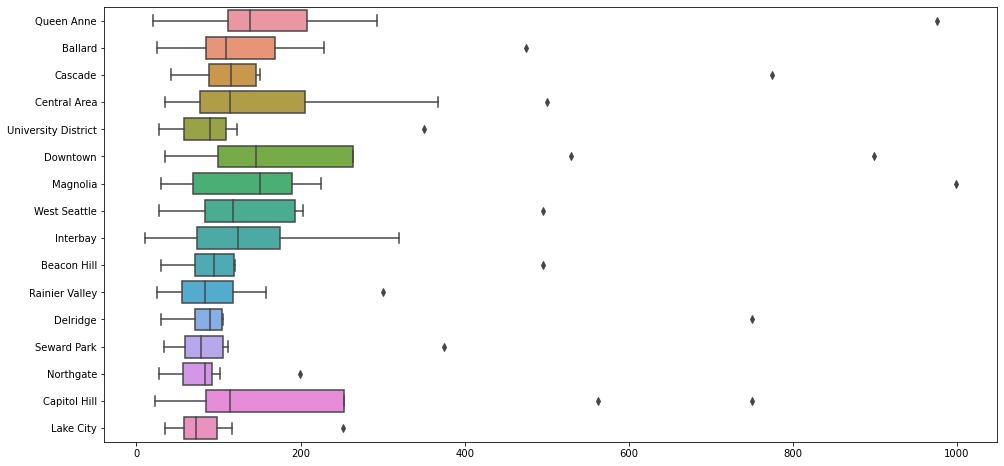

In [18]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = statPriceNeighborhoodGroup, orient = "h")

In [19]:
scoreCSV=pd.read_csv('progress_27_10.csv')
scoreCSV = scoreCSV.loc[:, ~scoreCSV.columns.str.contains('^Unnamed')]
scoreCSV.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Language,Accuracy,Normalized Score,Rating,Rating (Readjust)
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en,0.999997,0.7901,8.9505,9.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en,0.999996,0.9875,9.9375,10.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en,0.999998,0.8718,9.3590,9.5
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en,0.999997,0.8313,9.1565,9.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en,0.999997,0.9783,9.8915,10.0


In [20]:
scoreCSV['listing_id'].nunique()

3167

In [21]:
priceData = priceData.rename({'id': 'listing_id'}, axis=1)
priceData.head()

,listing_id,price,zipcode,neighbourhood_cleansed,neighbourhood_group_cleansed
0,241032,85.0,98119,West Queen Anne,Queen Anne
1,953595,150.0,98119,West Queen Anne,Queen Anne
2,3308979,975.0,98119,West Queen Anne,Queen Anne
3,7421966,100.0,98119,West Queen Anne,Queen Anne
4,278830,450.0,98119,West Queen Anne,Queen Anne


In [22]:
fullTable=pd.merge(priceData, scoreCSV, on=["listing_id"])
fullTable.head()

,listing_id,price,zipcode,neighbourhood_cleansed,neighbourhood_group_cleansed,id,date,reviewer_id,reviewer_name,comments,Language,Accuracy,Normalized Score,Rating,Rating (Readjust)
0,241032,85.0,98119,West Queen Anne,Queen Anne,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...,en,0.999998,0.9658,9.8290,10.0
1,241032,85.0,98119,West Queen Anne,Queen Anne,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...,en,0.999996,0.9838,9.9190,10.0
2,241032,85.0,98119,West Queen Anne,Queen Anne,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...,en,0.999998,0.8217,9.1085,9.0
3,241032,85.0,98119,West Queen Anne,Queen Anne,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien...",en,0.999996,0.8906,9.4530,9.5
4,241032,85.0,98119,West Queen Anne,Queen Anne,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...,en,0.999998,0.8221,9.1105,9.0


In [23]:
fullTable.shape

(82447, 15)

In [24]:
fullTable=fullTable.dropna()
fullTable.head()

,listing_id,price,zipcode,neighbourhood_cleansed,neighbourhood_group_cleansed,id,date,reviewer_id,reviewer_name,comments,Language,Accuracy,Normalized Score,Rating,Rating (Readjust)
0,241032,85.0,98119,West Queen Anne,Queen Anne,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...,en,0.999998,0.9658,9.8290,10.0
1,241032,85.0,98119,West Queen Anne,Queen Anne,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...,en,0.999996,0.9838,9.9190,10.0
2,241032,85.0,98119,West Queen Anne,Queen Anne,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...,en,0.999998,0.8217,9.1085,9.0
3,241032,85.0,98119,West Queen Anne,Queen Anne,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien...",en,0.999996,0.8906,9.4530,9.5
4,241032,85.0,98119,West Queen Anne,Queen Anne,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...,en,0.999998,0.8221,9.1105,9.0


In [25]:
queenAnne1=fullTable.loc[fullTable['neighbourhood_group_cleansed'] == 'Queen Anne']
queenAnne1.head()

,listing_id,price,zipcode,neighbourhood_cleansed,neighbourhood_group_cleansed,id,date,reviewer_id,reviewer_name,comments,Language,Accuracy,Normalized Score,Rating,Rating (Readjust)
0,241032,85.0,98119,West Queen Anne,Queen Anne,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...,en,0.999998,0.9658,9.8290,10.0
1,241032,85.0,98119,West Queen Anne,Queen Anne,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...,en,0.999996,0.9838,9.9190,10.0
2,241032,85.0,98119,West Queen Anne,Queen Anne,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...,en,0.999998,0.8217,9.1085,9.0
3,241032,85.0,98119,West Queen Anne,Queen Anne,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien...",en,0.999996,0.8906,9.4530,9.5
4,241032,85.0,98119,West Queen Anne,Queen Anne,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...,en,0.999998,0.8221,9.1105,9.0


In [26]:
queenAnne1.listing_id.unique()

array([ 241032,  953595, 3308979,  278830, 5956968, 1909058,  856550,
       4948745, 2493658,  175576, 4454295, 3883392, 8889257, 5680462,
       8988178, 3245876, 4933447, 6291829, 9218403, 4125779, 8942678,
       6362362, 3544550, 3200646, 8859380, 4520099, 2481869, 1110749,
       5978498, 5021081, 1686930, 7680289, 7207641, 5062445, 8925878,
       6389657, 4218733, 2715623, 1392332, 7308567, 6575380, 6004058,
       8515408, 5383192, 1112092, 7772661, 7714294, 6361863, 8105221,
       3269390, 9282409, 8095168, 2746782, 6424982,  762029, 3768745,
       3975434, 5620928, 7381677, 5487934,  757840, 8848403, 7430926,
       7021544, 1323446, 3925573, 8723086,  781474, 3401644, 5310193,
       5308875, 5052459, 7228499, 7651653, 1494986, 1783382, 7513198,
       8308316, 9694921, 2472850, 5487522, 4016650, 3479241, 5848400,
       6077760, 4642956, 1167507, 6044106, 1799255, 8941768, 6569950,
       7733192, 9215782, 5175631, 9134193, 2481189, 8535897, 3144311,
       6781308,  160

In [27]:
queenAnne1List=[ 241032,  953595, 3308979,  278830, 5956968, 1909058,  856550,
       4948745, 2493658,  175576, 4454295, 3883392, 8889257, 5680462,
       8988178, 3245876, 4933447, 6291829, 9218403, 4125779, 8942678,
       6362362, 3544550, 3200646, 8859380, 4520099, 2481869, 1110749,
       5978498, 5021081, 1686930, 7680289, 7207641, 5062445, 8925878,
       6389657, 4218733, 2715623, 1392332, 7308567, 6575380, 6004058,
       8515408, 5383192, 1112092, 7772661, 7714294, 6361863, 8105221,
       3269390, 9282409, 8095168, 2746782, 6424982,  762029, 3768745,
       3975434, 5620928, 7381677, 5487934,  757840, 8848403, 7430926,
       7021544, 1323446, 3925573, 8723086,  781474, 3401644, 5310193,
       5308875, 5052459, 7228499, 7651653, 1494986, 1783382, 7513198,
       8308316, 9694921, 2472850, 5487522, 4016650, 3479241, 5848400,
       6077760, 4642956, 1167507, 6044106, 1799255, 8941768, 6569950,
       7733192, 9215782, 5175631, 9134193, 2481189, 8535897, 3144311,
       6781308,  160222, 4250367, 8755479, 8829156, 5126077, 6108796,
       2692126, 3544953, 2020505, 5580457, 1495271, 8455865, 6065566,
       4645208, 6115807, 7091397, 6134153, 7763878, 8088447, 3418349,
       9199982, 6400000, 6776229, 7627794, 8374102, 6316934, 1820794,
       1602488, 9167786, 5686435, 7939058, 8392801, 7404370, 3720511,
       8193332, 7957904, 4555997, 2267088,  108468, 6400379, 5948003,
       5058086, 1209255, 1914051, 2923529, 1027860, 2373176, 6404427,
       8517602, 4583161, 7967844, 6562393, 7807087, 5405643, 7011200,
       7839535, 4814894, 7492877, 6576228,  241016, 6968101, 5648564,
       4116645, 2419879, 6425735, 8105351, 3639023, 6724599, 4211629,
       7151924,  704764, 1796217, 4661812, 4180905, 6603061, 5163047,
       8578023, 9061048, 7603457, 5639238, 5362889, 7203408,  544433,
       6276224, 5252515, 1622794, 8423118, 6248083, 7932696, 3215404,
       9522082, 3040278, 1071843, 4973204, 9118240, 6971260,  945833,
       5261239, 3720429, 6956301, 6750430, 8373664, 6783394, 6727846,
       1321090, 8503720, 6780670, 1060467, 6240501, 8150145, 8967776,
       9679301, 8690491, 7678064, 7798575, 4988679, 6093756, 7921289,
       8117705, 4324917, 5061566, 8518308, 3562617, 7109735, 8501721,
       5306727,  909102, 8608525,  170273, 7075913,  481220, 6961346,
       6517594, 7680670, 5946675, 7162664, 6901218, 4951430, 7202016,
       5538663,  363064, 7809595, 9094836, 3039438, 8847979, 4047399]

In [28]:
newRatingListAnne=[]
for j in queenAnne1List:
    sumQueenAnne=queenAnne1.loc[queenAnne1['listing_id'] == j, 'Rating'].sum()
    lenQueenAnne=len(queenAnne1.loc[queenAnne1['listing_id'] == j])
    newRatingListAnne.append(sumQueenAnne/lenQueenAnne)

In [29]:
ratingAggregated_QueenAnne=pd.DataFrame(newRatingListAnne, columns = ['Queen Anne Rating'])
ratingAggregated_QueenAnne.head()

,Queen Anne Rating
0,9.517907
1,9.707000
2,9.792250
3,9.572514
4,9.754324


In [30]:
listing_id_QueenAnne=pd.DataFrame(queenAnne1List, columns = ['listing_id'])
listing_id_QueenAnne.head()

,listing_id
0,241032
1,953595
2,3308979
3,278830
4,5956968


In [31]:
aggregatedRating=ratingAggregated_QueenAnne.join(listing_id_QueenAnne)
aggregatedRating.head()

,Queen Anne Rating,listing_id
0,9.517907,241032
1,9.707000,953595
2,9.792250,3308979
3,9.572514,278830
4,9.754324,5956968


In [32]:
price_queenAnne=pd.DataFrame(queenAnne1[['price', 'listing_id']])
#price_QueenAnne=pd.DataFrame(price_queenAnneList, columns = ['Queen Anne Price'])
price_QueenAnne = price_queenAnne.drop_duplicates('listing_id')
print(price_QueenAnne)

       price  listing_id
0       85.0      241032
205    150.0      953595
246    975.0     3308979
264    450.0      278830
299    120.0     5956968
...      ...         ...
70343   75.0     7809595
70371   80.0     9094836
70372  100.0     3039438
70384   98.0     8847979
70398  299.0     4047399

[245 rows x 2 columns]


In [33]:
aggregatedRatingTry=pd.merge(price_QueenAnne, aggregatedRating, on=["listing_id"])
aggregatedRatingTry.head()

,price,listing_id,Queen Anne Rating
0,85.0,241032,9.517907
1,150.0,953595,9.707000
2,975.0,3308979,9.792250
3,450.0,278830,9.572514
4,120.0,5956968,9.754324


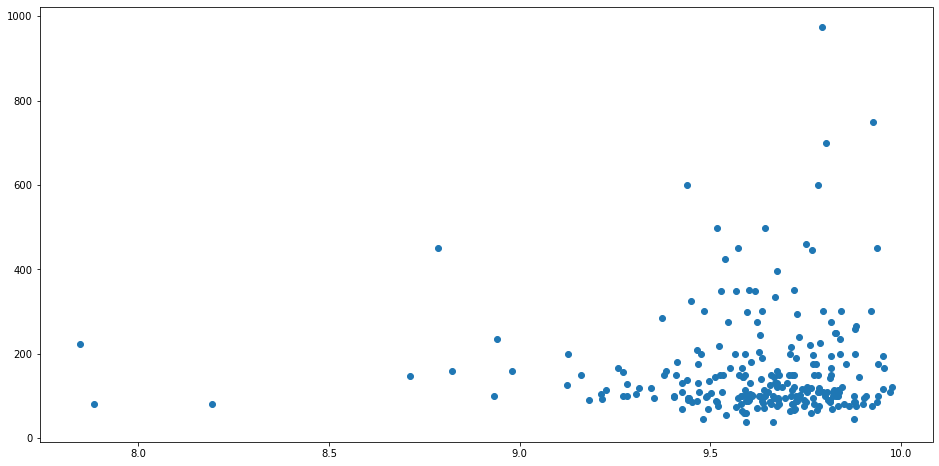

In [34]:
# Create a joint dataframe by concatenating the two variables
#3X = pd.concat([pred1, resp1], axis = 1).reindex(pred1.index)

# Jointplot of Total Train against HP Train
#sb.jointplot(data = trainDF, x = "Normalized Score", y = "price", height = 12)

XqueenAnne = pd.DataFrame(aggregatedRatingTry[['price', 'Queen Anne Rating']])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Queen Anne Rating", y = "price", data = XqueenAnne)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


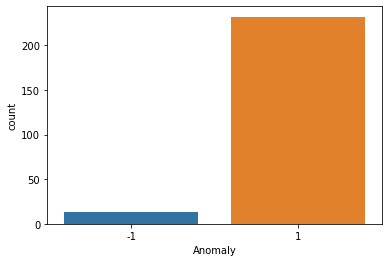

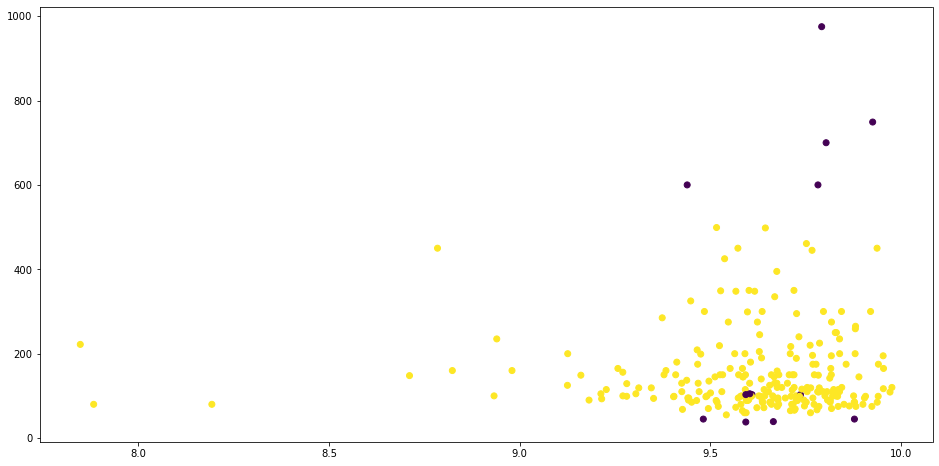

In [35]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(XqueenAnne)

# Predict the Anomalies
labels = lof.fit_predict(XqueenAnne)

# Append Labels to the Data
X_labeled_queenAnne = XqueenAnne.copy()
X_labeled_queenAnne["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled_queenAnne["Anomaly"])

# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Queen Anne Rating", y = "price", c = "Anomaly", cmap = 'viridis', data = X_labeled_queenAnne)

,price,Queen Anne Rating
price,1.000000,-0.024858
Queen Anne Rating,-0.024858,1.000000


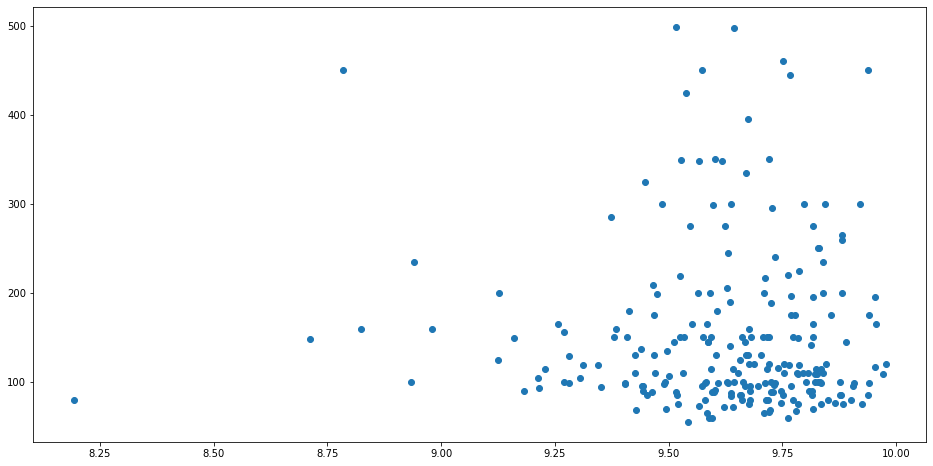

In [36]:
X_labeled_queenAnne.drop(X_labeled_queenAnne[(X_labeled_queenAnne['Anomaly'] ==-1)].index, inplace=True)
X_labeled_queenAnne.drop(X_labeled_queenAnne[(X_labeled_queenAnne['Queen Anne Rating'] <8)].index, inplace=True)

f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Queen Anne Rating", y = "price", data = X_labeled_queenAnne)

queenAnne2=X_labeled_queenAnne
queenAnne2.corr()

In [37]:
resp1=pd.DataFrame(queenAnne2['price'])
pred1 =pd.DataFrame(queenAnne2['Queen Anne Rating'])

In [38]:
resp= resp1.iloc[:].values
pred = pred1.iloc[:].values

resp= resp.astype(float)
pred= pred.astype(float)

In [39]:
#X=pd.DataFrame(aggregatedRatingTry['Queen Anne Rating'])
#y=pd.DataFrame(aggregatedRatingTry['price'])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Intercept of Regression 	: b =  [355.85248301]
Coefficients of Regression 	: a =  [[-21.07695226]]



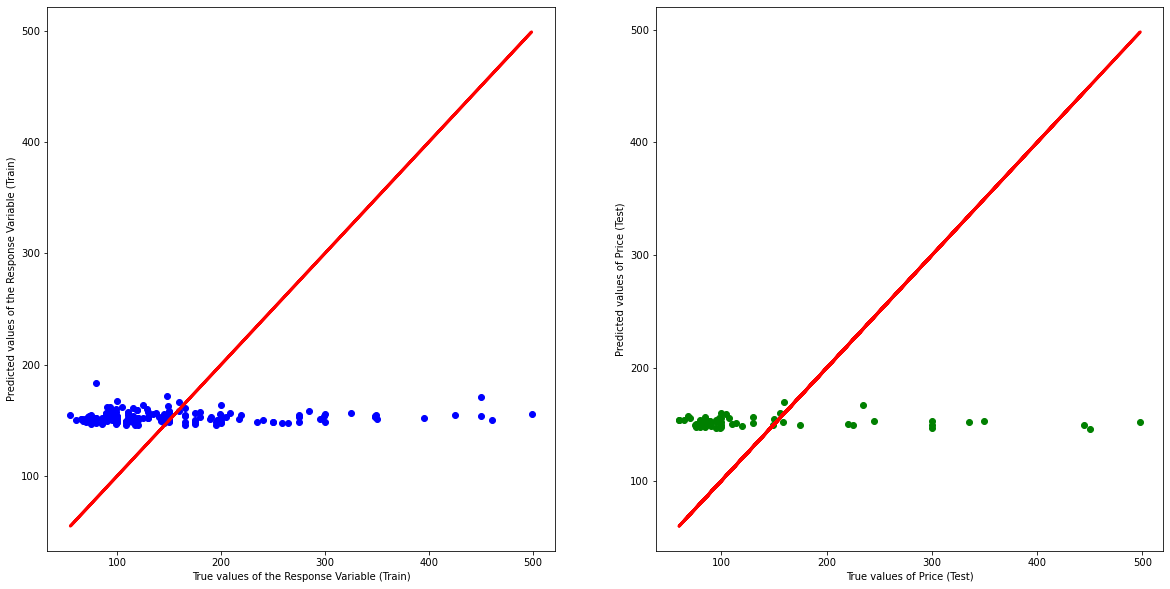

In [41]:
# Recall the Total-HP Dataset

X=pred
y=resp

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, linewidth = 3, color='red')
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, linewidth = 3, color='red')
axes[1].set_xlabel("True values of Price (Test)")
axes[1].set_ylabel("Predicted values of Price (Test)")
plt.show()

In [42]:
# Import mean_squared_error from sklearn
from sklearn.metrics import r2_score, mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.003636906692023878
Mean Squared Error (MSE) 	: 7347.0338007898645

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.01264422640335372
Mean Squared Error (MSE) 	: 10784.86329922192



C:\Users\User\AppData\Local\Temp\ipykernel_5548\2207678613.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Traning Data:
r-sqaured score: 0.768
mean-sqaured error: 2105.839
---
Test Data:
r-sqaured score: -0.719
mean-sqaured error: 10357.618
---


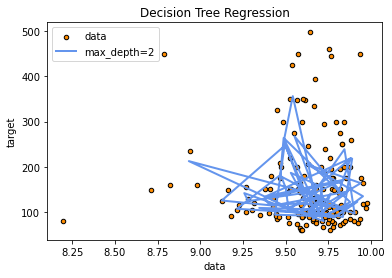

In [43]:
from sklearn.ensemble import RandomForestRegressor

X=pred
y=resp

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


forest = RandomForestRegressor(n_estimators=100,n_jobs=-1)
forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Print model evaluation scores for training and test
print('Traning Data:')
print('r-sqaured score: %.3f' % r2_score(y_train, y_train_pred))
print('mean-sqaured error: %.3f' % mean_squared_error(y_train, y_train_pred))
print('---')
print('Test Data:')
print('r-sqaured score: %.3f' % r2_score(y_test, y_test_pred))
print('mean-sqaured error: %.3f' % mean_squared_error(y_test, y_test_pred))
print('---')
    

#Print Model's Residuals
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_test_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


In [44]:
print(sum(y_test_pred)/len(y_test_pred))

143.89188405797103


In [45]:
amenities=listing.amenities
all_amenities = []
for x in amenities:
    all_amenities.extend(x.replace('{','').replace('}','').replace('"','').split(','))
unique_amenities = pd.unique(all_amenities)
unique_amenities

array(['TV', 'Cable TV', 'Internet', 'Wireless Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly',
       'Washer', 'Dryer', 'Free Parking on Premises',
       'Buzzer/Wireless Intercom', 'Smoke Detector',
       'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card',
       'Fire Extinguisher', 'Essentials', 'Pets Allowed',
       'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub',
       'Indoor Fireplace', 'Shampoo', 'Breakfast', '24-Hour Check-in',
       'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace',
       'Suitable for Events', 'Elevator in Building',
       'Lock on Bedroom Door', 'Wheelchair Accessible', 'Gym', '', 'Pool',
       'Smoking Allowed', 'Other pet(s)', 'Doorman', 'Washer / Dryer'],
      dtype=object)

In [46]:
zeroMatrix = np.zeros((len(listing),len(unique_amenities)))
dummiesAmenities = pd.DataFrame(zeroMatrix,columns=unique_amenities)

In [47]:
zeroMatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
dummiesAmenities

,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
for i,ame in enumerate(amenities):
    indices = dummiesAmenities.columns.get_indexer(ame.replace('{','').replace('}','').replace('"','').split(','))
    dummiesAmenities.iloc[i,indices]=1
dummiesAmenities

,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3814,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3815,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3816,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


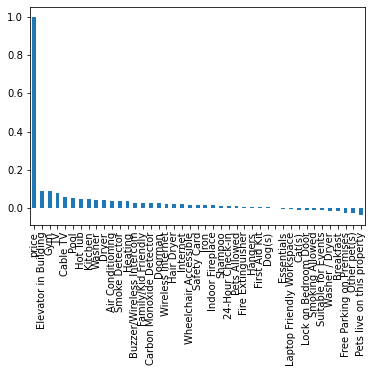

In [50]:
df_list_ame_price = pd.concat([priceData['price'],dummiesAmenities],axis=1)
df_list_ame_price.corr()['price'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

In [51]:
df_list_ame_price.corr()['price'].sort_values(ascending=False)

price                         1.000000
Elevator in Building          0.090574
Gym                           0.086571
TV                            0.080715
Cable TV                      0.058374
Pool                          0.054207
Hot Tub                       0.045282
Kitchen                       0.045035
Washer                        0.042255
Dryer                         0.040350
Air Conditioning              0.036206
Smoke Detector                0.034179
Heating                       0.034032
Buzzer/Wireless Intercom      0.027349
Family/Kid Friendly           0.026095
Carbon Monoxide Detector      0.024048
Doorman                       0.023767
Wireless Internet             0.022016
Hair Dryer                    0.021680
Internet                      0.021310
Wheelchair Accessible         0.017332
Safety Card                   0.017119
Iron                          0.016161
Indoor Fireplace              0.014848
Shampoo                       0.012884
24-Hour Check-in         

In [52]:
df_list_ame_price

,price,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,85.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,150.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,975.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,450.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,NaN,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1917,NaN,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2521,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
d1 = df_list_ame_price.dropna()

In [54]:
d1

,price,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,85.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,150.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,975.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,450.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,359.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3807,79.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3808,93.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3809,99.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
pd.DataFrame(d1['price']).describe()

,price
count,3804.000000
mean,127.861199
std,90.158774
min,20.000000
25%,75.000000
50%,100.000000
75%,150.000000
max,1000.000000


<AxesSubplot:xlabel='price'>

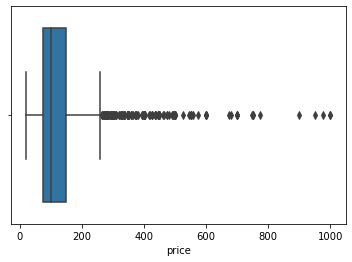

In [56]:
sb.boxplot(x='price',data=d1)

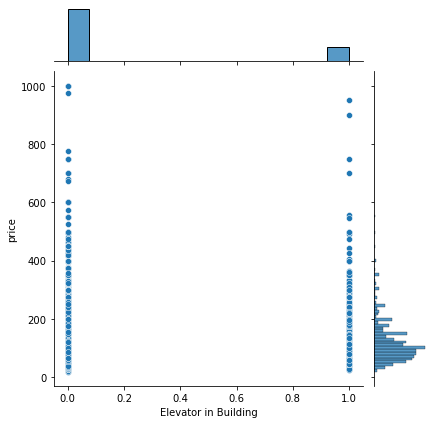

In [57]:
sb.jointplot(x='Elevator in Building',y='price',data=d1)

In [58]:
sb.pairplot(data=d1)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000025545900CA0> (for post_execute):


KeyboardInterrupt: 

In [59]:
d1.columns

Index(['price', 'TV', 'Cable TV', 'Internet', 'Wireless Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly',
       'Washer', 'Dryer', 'Free Parking on Premises',
       'Buzzer/Wireless Intercom', 'Smoke Detector',
       'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card',
       'Fire Extinguisher', 'Essentials', 'Pets Allowed',
       'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub',
       'Indoor Fireplace', 'Shampoo', 'Breakfast', '24-Hour Check-in',
       'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace',
       'Suitable for Events', 'Elevator in Building', 'Lock on Bedroom Door',
       'Wheelchair Accessible', 'Gym', '', 'Pool', 'Smoking Allowed',
       'Other pet(s)', 'Doorman', 'Washer / Dryer'],
      dtype='object')

In [60]:
listing['last_scraped'].unique()

array(['2016-01-04'], dtype=object)

In [61]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [62]:
listing[''].nunique()

KeyError: ''

<AxesSubplot:>

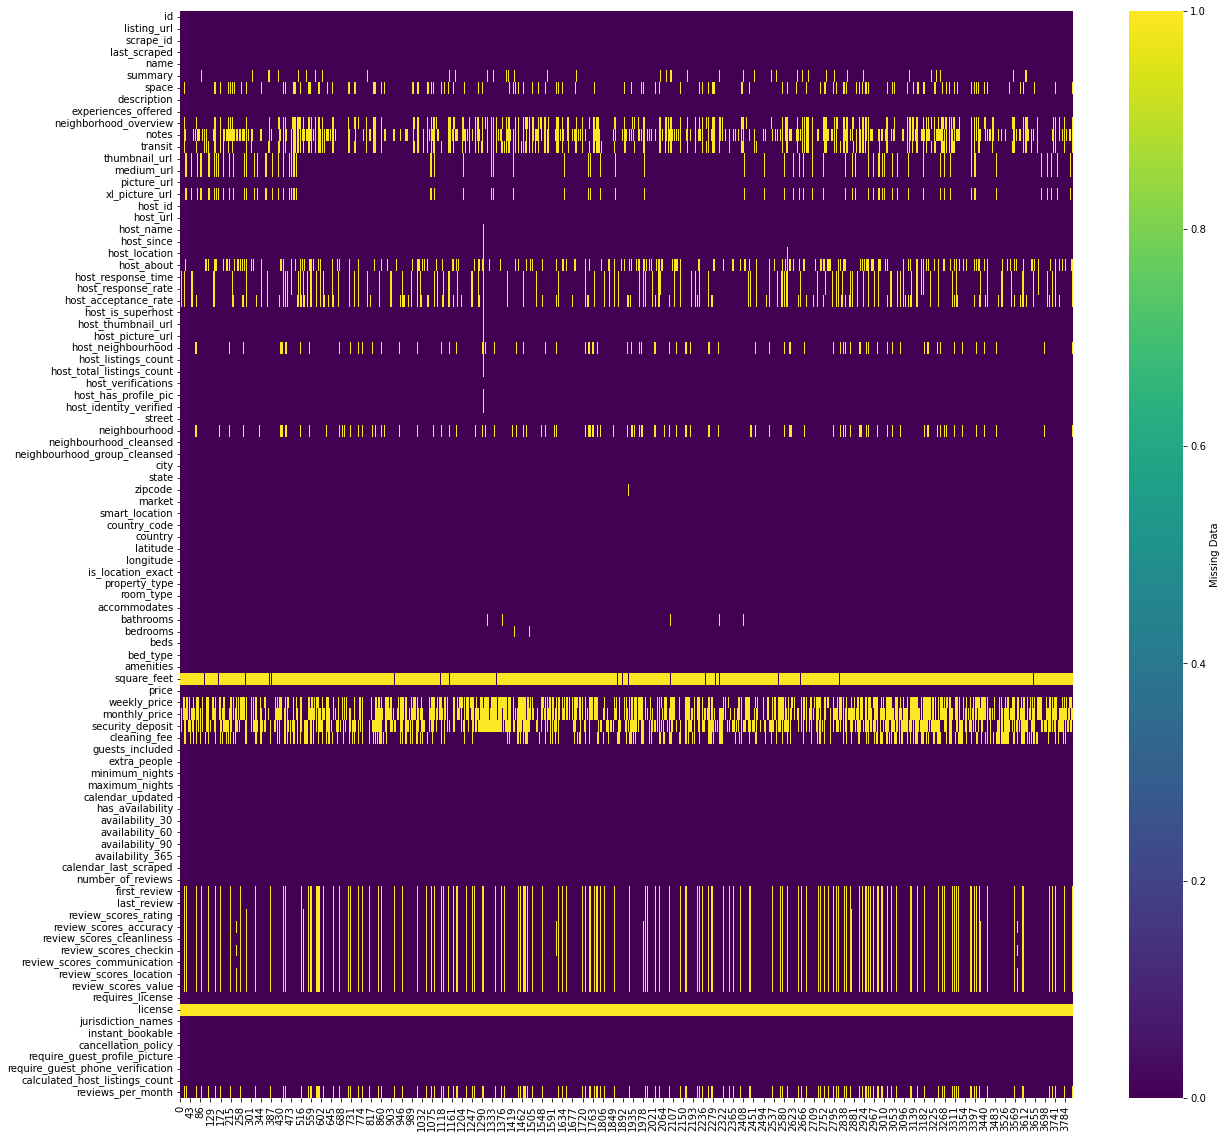

In [63]:
plt.figure(figsize=(20,20))
sb.heatmap(listing.isnull().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

In [64]:
listing['id']

0         241032
1         953595
2        3308979
3        7421966
4         278830
          ...   
3813     8101950
3814     8902327
3815    10267360
3816     9604740
3817    10208623
Name: id, Length: 3818, dtype: int64

In [65]:
scoreCSV['date'].max()

'2016-01-03'

In [66]:
cleanPriceData.shape

(3811, 1)

In [67]:
listing.rename({'id':'listing_id'}, axis=1, inplace=True)

In [68]:
listing

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [69]:
table2 = pd.merge(listing, priceData, on=['listing_id'])

#fullTable=pd.merge(priceData, scoreCSV, on=["listing_id"])
#fullTable.head()

In [70]:
table2

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_y,zipcode_y,neighbourhood_cleansed_y,neighbourhood_group_cleansed_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,85.0,98119,West Queen Anne,Queen Anne
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,strict,t,t,6,1.48,150.0,98119,West Queen Anne,Queen Anne
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,strict,f,f,2,1.15,975.0,98119,West Queen Anne,Queen Anne
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,flexible,f,f,1,NaN,100.0,98119,West Queen Anne,Queen Anne
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,strict,f,f,1,0.89,450.0,98119,West Queen Anne,Queen Anne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,f,strict,f,f,8,0.30,NaN,98107,Fremont,Other neighborhoods
3807,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,f,moderate,f,f,1,2.00,NaN,98102,Portage Bay,Capitol Hill
3808,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,f,moderate,f,f,1,NaN,NaN,98178,Rainier Beach,Rainier Valley
3809,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,f,moderate,f,f,1,NaN,NaN,98112,Madison Park,Capitol Hill


In [71]:
table2.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed_x',
       'neighbourhood_group_cleansed_x', 'city', 'state', 'zipcode_x',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_

In [72]:
table2['monthly_price']

0             NaN
1       $3,000.00
2             NaN
3       $2,300.00
4             NaN
          ...    
3806          NaN
3807          NaN
3808          NaN
3809          NaN
3810          NaN
Name: monthly_price, Length: 3811, dtype: object

In [73]:
table2['price_x']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3806    $359.00
3807     $79.00
3808     $93.00
3809     $99.00
3810     $87.00
Name: price_x, Length: 3811, dtype: object

In [74]:
table2[table2['price_y'].isna()]

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_y,zipcode_y,neighbourhood_cleansed_y,neighbourhood_group_cleansed_y
3804,8578490,https://www.airbnb.com/rooms/8578490,20160104002432,2016-01-04,Super Convenient Top Floor Apt,In the true spirit of AirBNB this unit is avai...,The building is older (1970's) so not the mode...,In the true spirit of AirBNB this unit is avai...,none,I am equidistant to Fremont and Wallingford an...,...,f,moderate,f,f,1,0.63,NaN,98103,Fremont,Other neighborhoods
3805,3383329,https://www.airbnb.com/rooms/3383329,20160104002432,2016-01-04,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",none,It's taken me a while to figure out why Fremon...,...,t,moderate,t,t,3,4.01,NaN,98107,Fremont,Other neighborhoods
3806,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,f,strict,f,f,8,0.30,NaN,98107,Fremont,Other neighborhoods
3807,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,f,moderate,f,f,1,2.00,NaN,98102,Portage Bay,Capitol Hill
3808,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,f,moderate,f,f,1,NaN,NaN,98178,Rainier Beach,Rainier Valley
3809,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,f,moderate,f,f,1,NaN,NaN,98112,Madison Park,Capitol Hill
3810,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,f,flexible,f,f,1,NaN,NaN,98109,East Queen Anne,Queen Anne


In [75]:
priceData

,listing_id,price,zipcode,neighbourhood_cleansed,neighbourhood_group_cleansed
0,241032,85.0,98119,West Queen Anne,Queen Anne
1,953595,150.0,98119,West Queen Anne,Queen Anne
2,3308979,975.0,98119,West Queen Anne,Queen Anne
3,7421966,100.0,98119,West Queen Anne,Queen Anne
4,278830,450.0,98119,West Queen Anne,Queen Anne
...,...,...,...,...,...
3813,8101950,NaN,98107,Fremont,Other neighborhoods
3814,8902327,NaN,98102,Portage Bay,Capitol Hill
3815,10267360,NaN,98178,Rainier Beach,Rainier Valley
3816,9604740,NaN,98112,Madison Park,Capitol Hill


<AxesSubplot:>

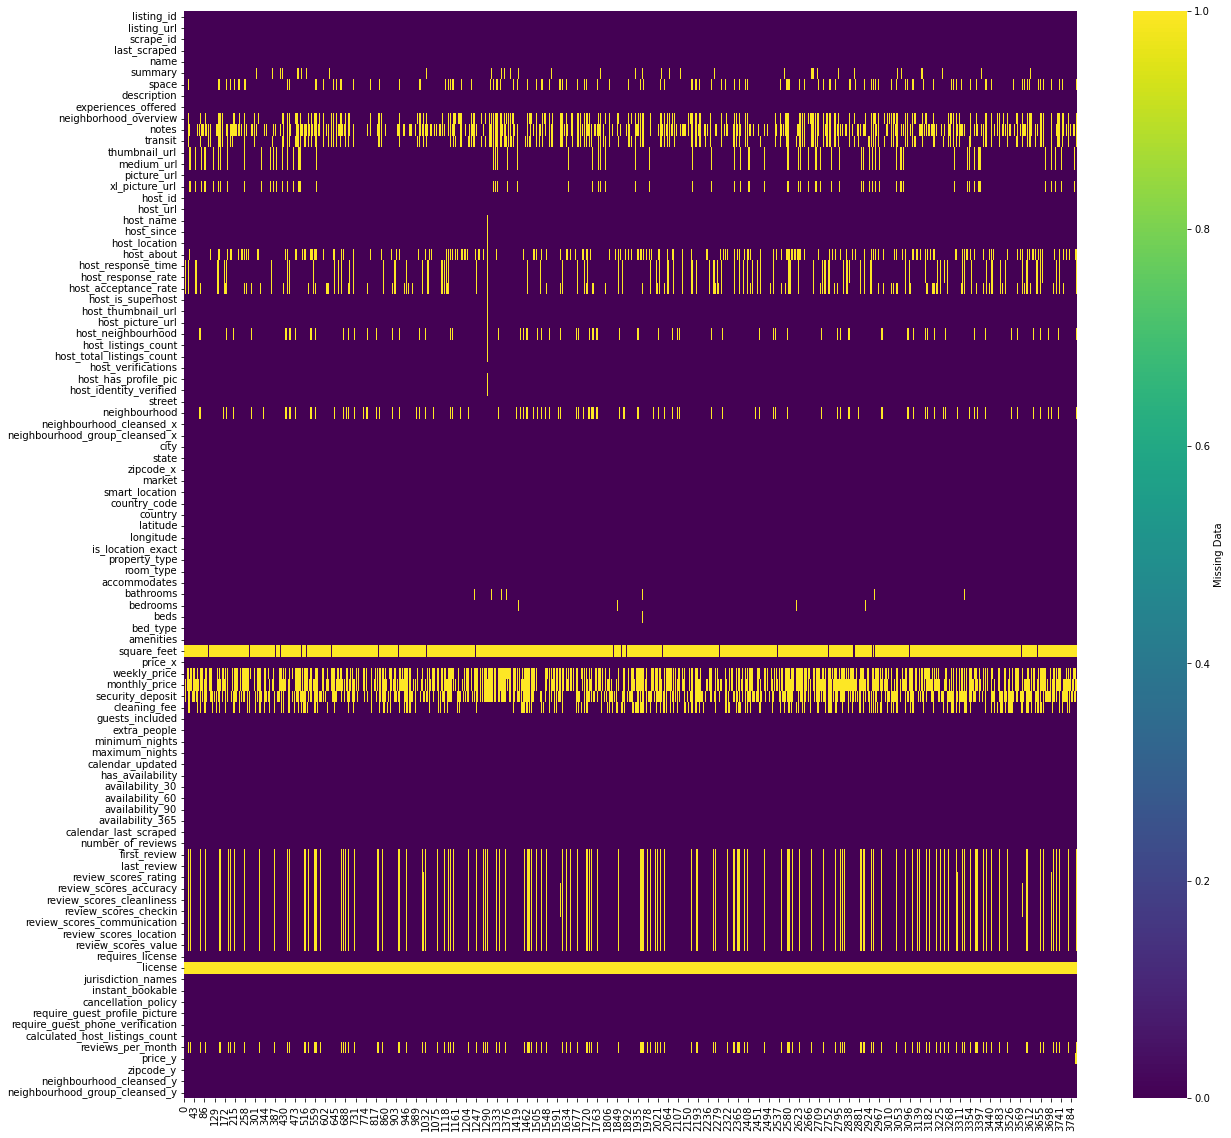

In [76]:
plt.figure(figsize=(20,20))
sb.heatmap(table2.isnull().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

In [77]:
table2.drop(columns=['zipcode_y','neighbourhood_cleansed_y',
       'neighbourhood_group_cleansed_y','license','weekly_price','monthly_price','square_feet'],inplace=True)

<AxesSubplot:>

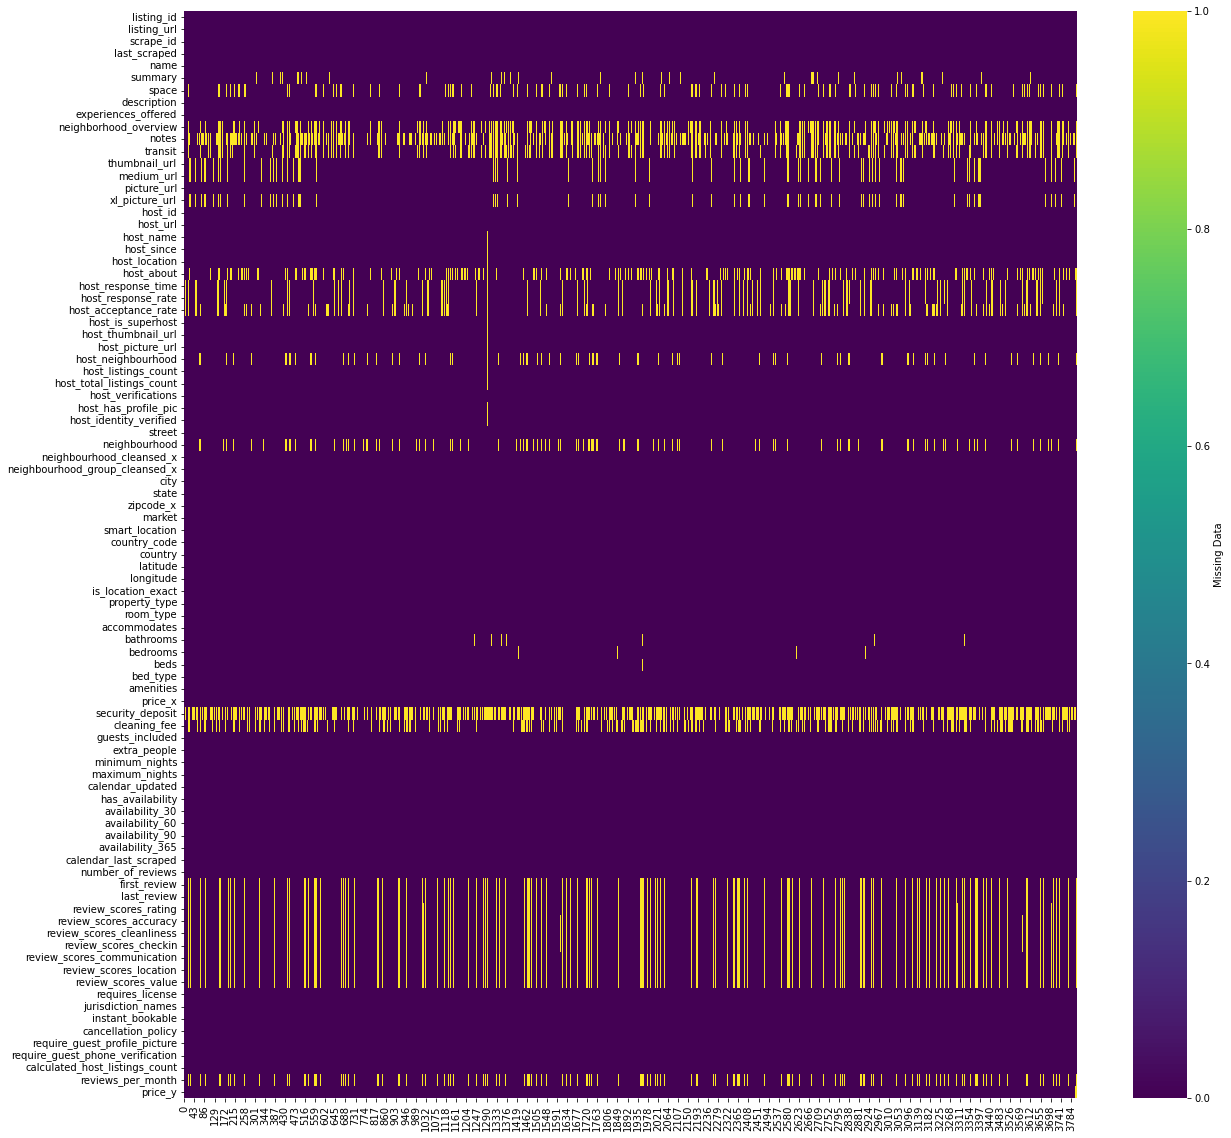

In [78]:
plt.figure(figsize=(20,20))
sb.heatmap(table2.isnull().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

In [79]:
table2.drop(columns=['price_x'],inplace=True)

In [80]:
table2['bathrooms'].unique()

array([1. , 4.5, 2. , 3.5, 1.5, 2.5, 3. , 0.5, 4. , 0. , 8. , nan, 5. ])

In [81]:
bathroom_na = list(table2[table2['bathrooms'].isnull()].index)
table2.drop(bathroom_na, inplace=True)

In [82]:
beds_na = list(table2[table2['beds'].isnull()].index)
table2.drop(beds_na, inplace=True)

In [83]:
bedrooms_na = list(table2[table2['bedrooms'].isnull()].index)
table2.drop(bedrooms_na, inplace=True)

<AxesSubplot:>

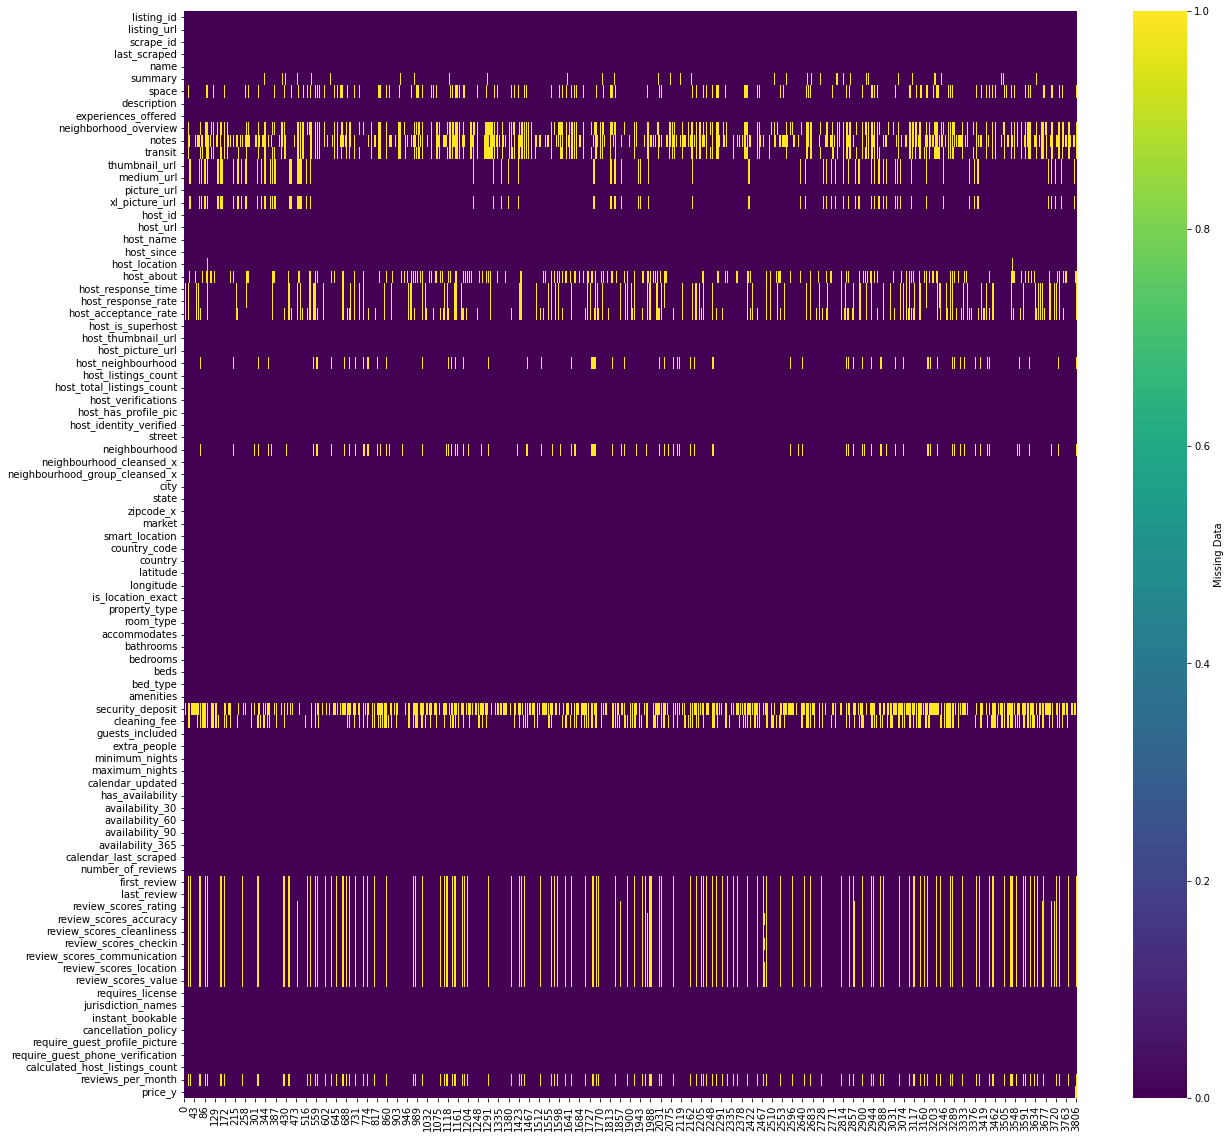

In [84]:
plt.figure(figsize=(20,20))
sb.heatmap(table2.isnull().transpose(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})

In [85]:
table2['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [86]:
table2['instant_bookable'].replace({'f':0.0,'t':1.0},inplace=True)

In [87]:
table2['cancellation_policy'].unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

In [88]:
table2['cancellation_policy'].replace({'flexible':0,'moderate':1,'strict':2},inplace=True)

In [89]:
table2['require_guest_profile_picture'].unique()

array(['f', 't'], dtype=object)

In [90]:
table2['require_guest_profile_picture'].replace({'f':0,'t':1},inplace=True)

In [91]:
table2['require_guest_phone_verification'].unique()

array(['f', 't'], dtype=object)

In [92]:
table2['require_guest_phone_verification'].replace({'f':0,'t':1},inplace=True)

In [93]:
table2['has_availability'].unique()

array(['t'], dtype=object)

In [94]:
table2['has_availability'].replace({'t':1},inplace=True)

In [95]:
table2['extra_people'].unique()

array(['$5.00', '$0.00', '$25.00', '$15.00', '$30.00', '$10.00', '$20.00',
       '$50.00', '$60.00', '$75.00', '$100.00', '$35.00', '$40.00',
       '$45.00', '$7.00', '$14.00', '$55.00', '$18.00', '$29.00',
       '$12.00', '$19.00', '$8.00', '$21.00', '$26.00', '$17.00',
       '$44.00', '$9.00', '$80.00', '$200.00', '$28.00', '$85.00',
       '$250.00', '$13.00', '$16.00', '$300.00', '$33.00', '$49.00',
       '$22.00', '$27.00', '$68.00', '$71.00', '$48.00', '$6.00',
       '$36.00', '$175.00'], dtype=object)

In [96]:
table2['extra_people'] = [x.strip('$') for x in table2['extra_people']]

In [97]:
table2['extra_people'] = [x.strip('.00') for x in table2['extra_people']]

In [98]:
table2['extra_people'].replace({'':'0'},inplace=True)

In [99]:
table2['extra_people'].unique()

array(['5', '0', '25', '15', '3', '1', '2', '6', '75', '35', '4', '45',
       '7', '14', '55', '18', '29', '12', '19', '8', '21', '26', '17',
       '44', '9', '28', '85', '13', '16', '33', '49', '22', '27', '68',
       '71', '48', '36', '175'], dtype=object)

In [100]:
table2['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [101]:
table2['bed_type'].replace({'Couch':0,'Airbed':1,'Pull-out Sofa':2,'Futon':3,'Real Bed':4},inplace=True)

In [102]:
table2['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [103]:
table2['bed_type'].replace({'Shared room':0,'Private room':1, 'Entire home/apt':2},inplace=True)

In [104]:
table2['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Other', 'Dorm',
       'Bed & Breakfast', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [105]:
proptype_na = list(table2[table2['property_type'].isnull()].index)
table2.drop(proptype_na, inplace=True)

In [106]:
table2['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Other', 'Dorm',
       'Bed & Breakfast', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
      dtype=object)

In [107]:
table2['property_type'].replace({'Apartment':15, 'House':14, 'Cabin':13, 'Condominium':12, 'Camper/RV':11,
       'Bungalow':10, 'Townhouse':9, 'Loft':8, 'Boat':7, 'Other':6, 'Dorm':5,
       'Bed & Breakfast':4, 'Treehouse':3, 'Yurt':2, 'Chalet':1, 'Tent':0},inplace=True)

In [108]:
table2['is_location_exact'].unique()

array(['t', 'f'], dtype=object)

In [109]:
table2['is_location_exact'].replace({'f':0,'t':1},inplace=True)

In [110]:
table2['smart_location'].unique()

array(['Seattle, WA', 'Ballard, Seattle, WA', 'West Seattle, WA',
       'Seattle , WA', '西雅图, WA', 'Phinney Ridge Seattle, WA',
       'seattle, wa'], dtype=object)

In [111]:
table2['neighbourhood_group_cleansed_x'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [112]:
statPriceNeighborhoodGroup

,Queen Anne,Ballard,Cascade,Central Area,University District,Downtown,Magnolia,West Seattle,Interbay,Beacon Hill,Rainier Valley,Delridge,Seward Park,Northgate,Capitol Hill,Lake City
count,293.000000,229.000000,89.000000,368.000000,122.000000,529.000000,61.000000,203.000000,10.000000,118.000000,158.000000,79.000000,44.000000,80.000000,563.000000,67.000000
mean,157.986348,124.257642,143.977528,127.790761,93.655738,152.591682,177.180328,135.945813,157.900000,105.830508,91.208861,103.025316,103.181818,88.350000,127.460036,92.507463
std,116.909137,88.957554,114.281150,79.037067,59.670967,83.338619,178.323162,86.422930,96.428961,75.537086,51.466278,100.252498,71.644884,34.733743,86.234616,50.108178
min,20.000000,25.000000,42.000000,35.000000,28.000000,35.000000,30.000000,28.000000,25.000000,30.000000,25.000000,30.000000,34.000000,28.000000,22.000000,35.000000
25%,94.000000,70.000000,89.000000,75.000000,53.500000,105.000000,72.000000,75.000000,89.250000,60.750000,57.250000,56.500000,63.750000,64.750000,79.000000,60.000000
50%,119.000000,95.000000,115.000000,100.000000,85.000000,139.000000,125.000000,100.000000,150.000000,82.000000,77.000000,76.000000,85.000000,86.000000,100.000000,78.000000
75%,179.000000,149.000000,150.000000,151.250000,105.000000,175.000000,225.000000,190.000000,225.000000,120.000000,105.000000,105.500000,111.250000,102.250000,150.000000,117.000000
max,975.000000,475.000000,775.000000,500.000000,350.000000,899.000000,999.000000,495.000000,320.000000,495.000000,300.000000,750.000000,375.000000,199.000000,750.000000,252.000000


<AxesSubplot:>

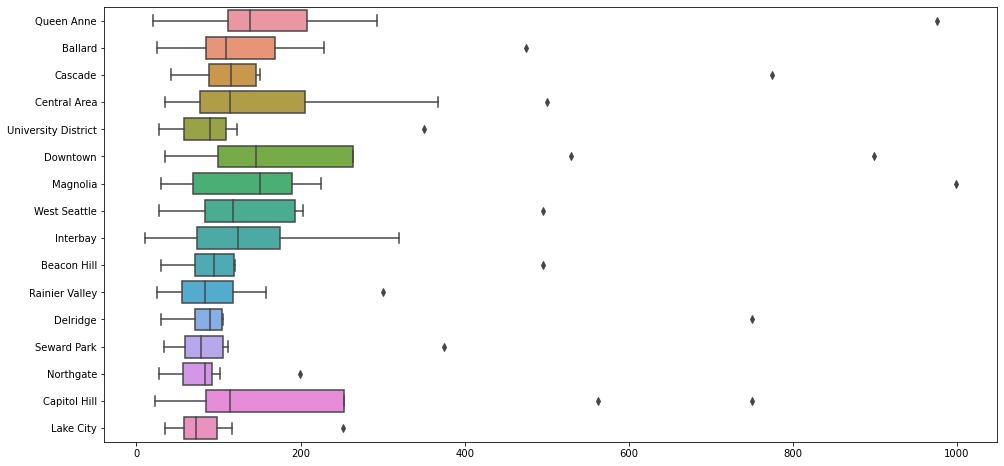

In [113]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = statPriceNeighborhoodGroup, orient = "h")

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 14400x14400 with 0 Axes>

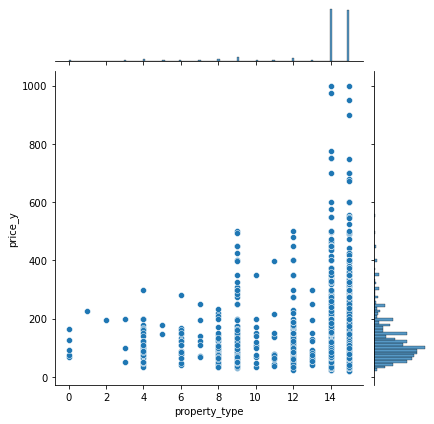

In [114]:
f = plt.figure(figsize=(200, 200))
sb.jointplot(x='property_type',y='price_y',data=table2)
plt.tight_layout

In [115]:
table2['bathrooms']

0       1.0
1       1.0
2       4.5
3       1.0
4       2.0
       ... 
3806    2.0
3807    1.0
3808    1.0
3809    1.0
3810    1.5
Name: bathrooms, Length: 3788, dtype: float64

In [116]:
table2['price_y']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3806      NaN
3807      NaN
3808      NaN
3809      NaN
3810      NaN
Name: price_y, Length: 3788, dtype: float64

In [117]:
table2.reset_index(inplace=True)

In [118]:
tableex = table2[['price_y','bathrooms','property_type']]

In [119]:
tableex

,price_y,bathrooms,property_type
0,85.0,1.0,15
1,150.0,1.0,15
2,975.0,4.5,14
3,100.0,1.0,15
4,450.0,2.0,14
...,...,...,...
3783,NaN,2.0,14
3784,NaN,1.0,15
3785,NaN,1.0,14
3786,NaN,1.0,12


In [120]:
tableex.corr()

,price_y,bathrooms,property_type
price_y,1.000000,0.072939,0.023577
bathrooms,0.072939,1.000000,-0.133060
property_type,0.023577,-0.133060,1.000000


In [121]:
table2.corr()['price_y'].sort_values(ascending=False)

price_y                             1.000000
review_scores_location              0.080239
bathrooms                           0.072939
accommodates                        0.072544
beds                                0.067480
bedrooms                            0.067084
host_total_listings_count           0.046202
host_listings_count                 0.046202
guests_included                     0.044930
cancellation_policy                 0.031120
review_scores_rating                0.029807
review_scores_cleanliness           0.029561
property_type                       0.023577
require_guest_phone_verification    0.022892
review_scores_accuracy              0.020167
availability_365                    0.016302
maximum_nights                      0.010933
host_id                             0.009520
availability_60                     0.008472
availability_90                     0.007691
review_scores_communication         0.007421
review_scores_checkin               0.005716
require_gu

In [122]:
importantFeature.shape

NameError: name 'importantFeature' is not defined

In [123]:
sb.pairplot(data = importantFeature)

NameError: name 'importantFeature' is not defined

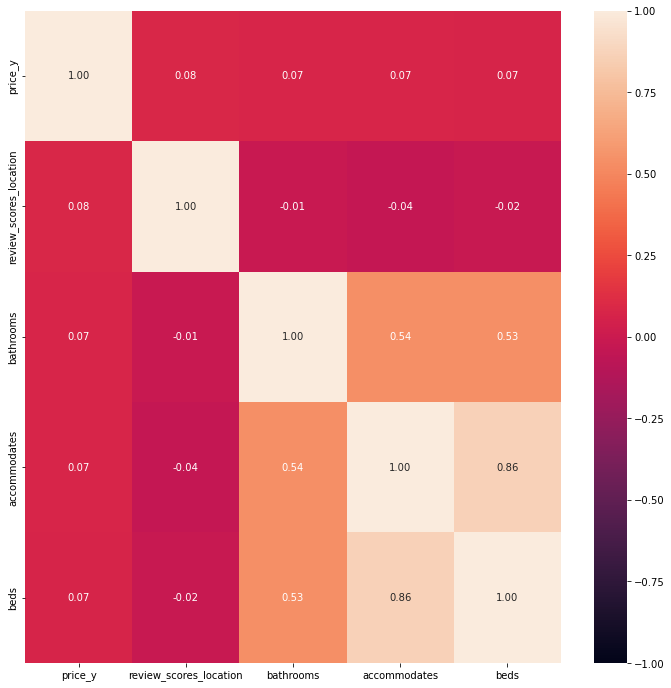

In [124]:
importantFeature=pd.DataFrame(table2[['price_y', 'review_scores_location', 'bathrooms', 'accommodates', 'beds']])
f = plt.figure(figsize=(12, 12))
figo = sb.heatmap(importantFeature.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f").get_figure()

In [ ]:
test1=pd.DataFrame(table2['review_scores_location'].dropna())


In [ ]:
table2['review_scores_location'].unique()

In [ ]:
test2=pd.DataFrame(table2['bathrooms'].dropna())

In [ ]:
test3=pd.DataFrame(table2['accommodates'].dropna())
f = plt.figure(figsize=(16, 8))

In [ ]:
test4=pd.DataFrame(table2['beds'].dropna())

In [ ]:
X=pd.DataFrame(table2[['review_scores_location', 'bathrooms', 'accommodates', 'beds']])
y=pd.DataFrame(table2['price_y'])

In [ ]:
x1=list(X[X['review_scores_location'].isnull()].index)

In [ ]:
X=X.drop(x1)
X[X['review_scores_location'].isnull()]
y=y.drop(x1)
X.reset_index(inplace=True)
y.reset_index(inplace=True)

In [ ]:
y

In [ ]:
y1=y.drop(x1)

In [ ]:
X.drop(columns='index',axis=1,inplace=True)

In [ ]:
X

In [ ]:
y.drop(columns='index',axis=1,inplace=True)

In [283]:
X

array([[9.51790732],
       [9.707     ],
       [9.57251429],
       [9.75432353],
       [9.66057018],
       [9.58956977],
       [9.80764286],
       [9.5325    ],
       [9.67751989],
       [9.83407143],
       [9.62958333],
       [9.55216667],
       [9.75219444],
       [9.9715    ],
       [9.72058642],
       [9.71203333],
       [9.839     ],
       [9.40483333],
       [9.9375    ],
       [8.784625  ],
       [9.48466667],
       [8.19275   ],
       [9.7775    ],
       [9.44876471],
       [9.769125  ],
       [9.67544915],
       [9.65581579],
       [9.6165    ],
       [9.37875   ],
       [9.67940909],
       [9.42544203],
       [8.71116667],
       [9.71953846],
       [9.57441667],
       [9.40935714],
       [8.93292105],
       [9.47083333],
       [8.98      ],
       [9.70248077],
       [9.90725   ],
       [9.43825   ],
       [9.58643182],
       [9.85075   ],
       [9.69690909],
       [9.938     ],
       [9.495     ],
       [9.67757009],
       [9.713

In [197]:
y1=list(y[y['price_y'].isnull()].index)

In [198]:
y1

[3135, 3136, 3137, 3138]

In [199]:
X.drop(y1,inplace=True)
y.drop(y1,inplace=True)

In [201]:
X= X.iloc[:].values
y = y.iloc[:].values

X= resp.astype(float)
y= pred.astype(float)

Intercept of Regression 	: b =  [84.49083862]
Coefficients of Regression 	: a =  [[6.87375938]]



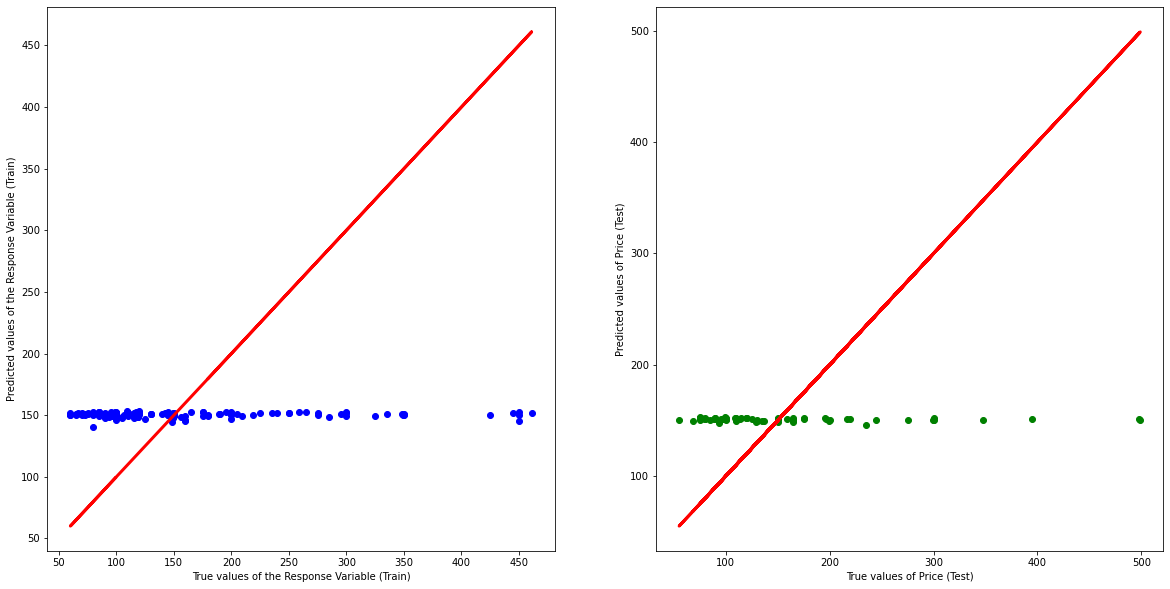

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#X=pd.DataFrame(table2[['bathrooms', 'accommodates', 'beds']])
#y=pd.DataFrame(table2['price_y'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, linewidth = 3, color='red')
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, linewidth = 3, color='red')
axes[1].set_xlabel("True values of Price (Test)")
axes[1].set_ylabel("Predicted values of Price (Test)")
plt.show()

/var/folders/94/f9x0lqds56z0w2_0w3jv6ny00000gn/T/ipykernel_2526/1671955069.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Traning Data:
r-sqaured score: 0.768
mean-sqaured error: 1927.898
---
Test Data:
r-sqaured score: -0.919
mean-sqaured error: 14993.096
---


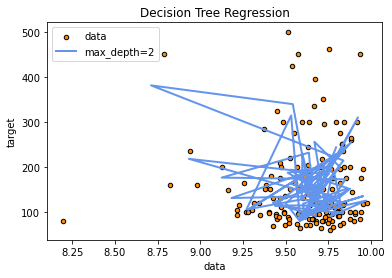

In [296]:
from sklearn.ensemble import RandomForestRegressor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


forest = RandomForestRegressor(n_estimators=100,n_jobs=-1)
forest.fit(X_train, y_train)

#calculate scores for the model
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Print model evaluation scores for training and test
print('Traning Data:')
print('r-sqaured score: %.3f' % r2_score(y_train, y_train_pred))
print('mean-sqaured error: %.3f' % mean_squared_error(y_train, y_train_pred))
print('---')
print('Test Data:')
print('r-sqaured score: %.3f' % r2_score(y_test, y_test_pred))
print('mean-sqaured error: %.3f' % mean_squared_error(y_test, y_test_pred))
print('---')
    

#Print Model's Residuals
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_test_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [297]:
print(sum(y_test_pred)/len(y_test_pred))

160.69507246376813
